
# Linear Regression, Price Optimisation & Price Elasticity of Demand

**Dataset:** `price_data.csv` (columns: `Price`, `Quantity`)  
**Author:** Generated by ChatGPT · 2025-10-16 13:44

## Objectives (from the brief)
- **Define Linear Regression** and provide concise notes.
- **Price optimisation using Linear Regression.**
- **Explain Price Elasticity of Demand (PED).**
- **Use the provided dataset to estimate PED** and interpret results.



## 1. Setup

Run the cell below to make sure the required libraries are available.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Plot settings (keep it simple; colors are not set explicitly)
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['axes.grid'] = True
print("Libraries imported.")


Libraries imported.



## 2. Linear Regression — Definition & Notes

**Definition.** Linear regression models the relationship between a **response** (dependent) variable \(y\) and one or more **predictors** (independent variables) \(x\).  
For a simple (one‑variable) model:

\[
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i,
\]

where \(\beta_0\) is the intercept, \(\beta_1\) is the slope, and \(\varepsilon_i\) is the error term. Parameters \(\beta\) are usually estimated by **ordinary least squares (OLS)** — minimizing the sum of squared residuals.

**Key ideas & diagnostics.**
- **Interpretation:** \(\beta_1\) is the expected change in \(y\) for a one‑unit increase in \(x\).
- **Goodness‑of‑fit:** \(R^2\) (coefficient of determination) summarizes the fraction of variance in \(y\) explained by the model.
- **Inference:** Use t‑tests / p‑values and confidence intervals to assess whether coefficients differ from 0.
- **Assumptions (OLS):** linearity, independence, homoskedastic (constant‑variance) errors, and approximate normality of residuals for valid inference.
- **Caveats:** correlation ≠ causation; outliers and omitted variables can bias coefficients; extrapolation beyond the data range is risky.



## 3. Price Elasticity of Demand (PED) — Concept

**Definition.** PED measures how **responsive** quantity demanded is to a change in price:


**PED** = \frac{\%\ \Delta Q}{\%\ \Delta P}.


- If **(|{PED}| > 1)**: **elastic** — quantity is very responsive to price; lowering price tends to raise revenue.
- If **(|{PED}| < 1)**: **inelastic** — quantity is less responsive; raising price tends to raise revenue.
- If **(|{PED}| = 1)**: **unit elastic** — revenue roughly unchanged for small price moves.

**Estimating PED from regression.**  
Two common approaches:

1. **Linear‑level demand:** (Q = a + bP). The local (point) elasticity at ((P, Q)) is  

**PED**(P, Q) = b cdot \frac{P}{Q}.

2. **Log‑log (constant elasticity) demand:** (ln Q = alpha + e ln P). The coefficient \(e\) **is the elasticity** everywhere in the sample.



## 4. Load the dataset
This notebook expects a CSV with columns **`Price`** and **`Quantity`**.  


In [ ]:
from pathlib import Path

CANDIDATES = [
    Path("price_data.csv"),
    Path("./data/price_data.csv"),
]

DATA_PATH = next((p for p in CANDIDATES if p.exists()), CANDIDATES[0])
print("Using:", DATA_PATH)

df = pd.read_csv(DATA_PATH)
assert {"Price", "Quantity"}.issubset(df.columns), "CSV must contain Price and Quantity columns"

df.head()


Using: price_data.csv


,Price,Quantity
0,192,80
1,145,960
2,240,200
3,240,150
4,375,740



## 5. Explore the data


In [3]:
print(df.describe(include="all"))


             Price      Quantity
count  1000.000000   1000.000000
mean    192.404000   1611.900000
std      84.275947   2534.252992
min      15.000000     60.000000
25%     145.000000    300.000000
50%     187.000000    700.000000
75%     216.000000   1907.500000
max    1008.000000  23150.000000


**Interpretation — Summary statistics**  

- The dataset size indicates how many observations were recorded.  
- Typical levels are captured by the **mean** and **median (50%)**.  
- The **range** (min → max) and **standard deviation** show how spread‑out prices and quantities are.  
- A wide spread in `Quantity` suggests outliers or very different demand regimes across prices.

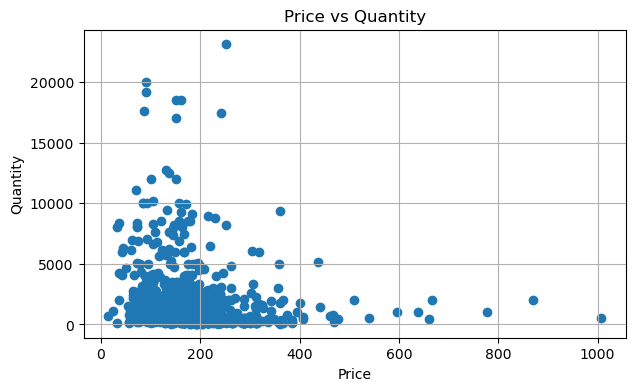

In [4]:
# Scatter plot: Price vs Quantity
plt.figure()
plt.scatter(df["Price"], df["Quantity"])
plt.title("Price vs Quantity")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()


**Interpretation — Price vs. Quantity scatter**  

There is a visible **downward relationship**: as **Price** increases, **Quantity** tends to decrease.  
Noise/outliers imply other factors also affect demand; price alone won’t explain 100% of variation.


## 6. Simple linear demand model: `Quantity ~ Price`

We fit `(Q = a + bP)`, report diagnostics, and compute **point elasticity at the sample means**  
\(\text{PED}_{\bar{P},\bar{Q}} = b \cdot \frac{\bar{P}}{\bar{Q}}\).


In [5]:
X = sm.add_constant(df["Price"])
lin_mod = sm.OLS(df["Quantity"], X).fit()
print(lin_mod.summary())


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     51.14
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           1.66e-12
Time:                        15:52:04   Log-Likelihood:                -9231.1
No. Observations:                1000   AIC:                         1.847e+04
Df Residuals:                     998   BIC:                         1.848e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2889.2504    194.994     14.817      0.0

**Interpretation — Linear demand model \(\,Q = \beta_0 + \beta_1 P + \varepsilon\,\)**  

- \(\beta_1 < 0\) (and statistically significant) confirms **downward‑sloping demand**.  
- \(\beta_1\) is the **expected change in quantity** for a 1‑unit increase in price.  
- \(R^2\) shows what share of variation in \(Q\) is explained by \(P\) alone (expect partial, not total, fit).  
- Use residual checks (linearity, homoskedasticity) before relying on inference.

In [6]:
a = lin_mod.params["const"]
b = lin_mod.params["Price"]
P_bar = df["Price"].mean()
Q_bar = df["Quantity"].mean()
ped_at_mean = b * (P_bar / Q_bar)

print(f"a (intercept) = {a:.4f}")
print(f"b (slope)     = {b:.4f}")
print(f"R^2           = {lin_mod.rsquared:.4f}")
print(f"PED at means  = {ped_at_mean:.4f}")


a (intercept) = 2889.2504
b (slope)     = -6.6389
R^2           = 0.0487
PED at means  = -0.7925


**Interpretation — Point elasticity under linear demand**  

For \(Q = a + bP\), the **point elasticity at \((P,Q)\)** is  
\[
\text{PED}(P,Q) \;=\; b \cdot \frac{P}{Q}\,.
\]
- If \(|\text{PED}| > 1\): **elastic** — small price cuts raise revenue.  
- If \(|\text{PED}| < 1\): **inelastic** — small price increases raise revenue.

In [7]:
# Elasticity per observation under linear demand
ped_point = b * (df["Price"] / df["Quantity"])
print(ped_point.describe())


count    1000.000000
mean       -3.681038
std         4.744340
min       -39.833385
25%        -4.890314
50%        -1.774127
75%        -0.544154
max        -0.027385
dtype: float64


**Interpretation — Summary statistics**  

- The dataset size indicates how many observations were recorded.  
- Typical levels are captured by the **mean** and **median (50%)**.  
- The **range** (min → max) and **standard deviation** show how spread‑out prices and quantities are.  
- A wide spread in `Quantity` suggests outliers or very different demand regimes across prices.

**Interpretation — Point elasticity under linear demand**  

For \(Q = a + bP\), the **point elasticity at \((P,Q)\)** is  
\[
\text{PED}(P,Q) \;=\; b \cdot \frac{P}{Q}\,.
\]
- If \(|\text{PED}| > 1\): **elastic** — small price cuts raise revenue.  
- If \(|\text{PED}| < 1\): **inelastic** — small price increases raise revenue.


## 7. Log–log demand model:  \(\ln Q \sim \alpha + e \ln P\)

In this specification, the coefficient \(e\) **is** the price elasticity of demand.


In [8]:
# Keep strictly positive observations for logs
df_pos = df[(df["Price"] > 0) & (df["Quantity"] > 0)].copy()

Xlog = sm.add_constant(np.log(df_pos["Price"]))
log_mod = sm.OLS(np.log(df_pos["Quantity"]), Xlog).fit()
print(log_mod.summary())

elasticity_loglog = log_mod.params["Price"]
print(f"Estimated elasticity (log-log): {elasticity_loglog:.4f}")


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     152.6
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           1.01e-32
Time:                        15:52:04   Log-Likelihood:                -1562.7
No. Observations:                1000   AIC:                             3129.
Df Residuals:                     998   BIC:                             3139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1370      0.449     27.027      0.0

**Interpretation — Log–log model \(\,\ln Q = \alpha + \varepsilon\, \ln P + u\,\)**  

- The coefficient on \(\ln P\) is the **price elasticity of demand** directly.  
- Example: \(\varepsilon = -1.2\) implies a **1%** increase in price leads to a **1.2%** fall in quantity (elastic).  
- \(|\varepsilon| < 1\) \(\Rightarrow\) inelastic; \(|\varepsilon| = 1\) \(\Rightarrow\) unit elastic.

**Interpretation — Point elasticity under linear demand**  

For \(Q = a + bP\), the **point elasticity at \((P,Q)\)** is  
\[
\text{PED}(P,Q) \;=\; b \cdot \frac{P}{Q}\,.
\]
- If \(|\text{PED}| > 1\): **elastic** — small price cuts raise revenue.  
- If \(|\text{PED}| < 1\): **inelastic** — small price increases raise revenue.


## 8. Price Optimisation

### 8.1 Revenue‑maximising price under linear demand

If \(Q(P) = a + bP\) with \(b < 0\), revenue \(R(P) = P \cdot Q(P) = aP + bP^2\).  
The maximiser is the vertex of the concave parabola:

\[
P^{\*}_{\text{revenue}} = -\frac{a}{2b} \quad (\text{valid only if } b<0).
\]

We also plot predicted revenue across a price grid.


Revenue-maximising price (linear demand): 217.60


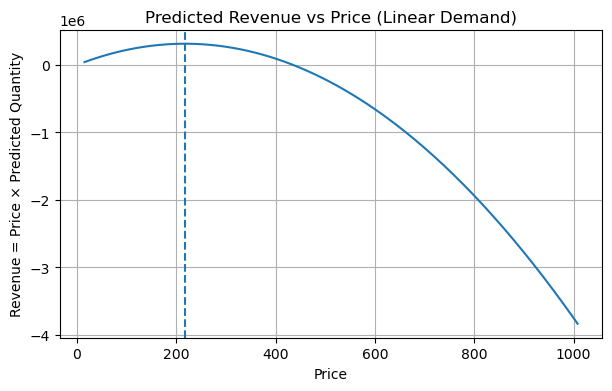

In [9]:
def demand_linear(p, a, b):
    return a + b * p

def revenue_linear(p, a, b):
    return p * demand_linear(p, a, b)

# Compute revenue-maximising price
if b < 0:
    P_star_rev = -a / (2*b)
    print(f"Revenue-maximising price (linear demand): {P_star_rev:.2f}")
else:
    P_star_rev = np.nan
    print("b >= 0, the linear fit does not imply a decreasing demand curve; no interior revenue optimum.")

# Plot revenue curve over a reasonable grid
p_min, p_max = df["Price"].min(), df["Price"].max()
grid = np.linspace(p_min, p_max, 200)
rev = revenue_linear(grid, a, b)

plt.figure()
plt.plot(grid, rev)
plt.axvline(P_star_rev, linestyle="--")
plt.title("Predicted Revenue vs Price (Linear Demand)")
plt.xlabel("Price")
plt.ylabel("Revenue = Price × Predicted Quantity")
plt.show()


**Interpretation — Revenue vs. Price**  

Let **Revenue** \(R = P \times Q(P)\). As \(P\) rises, \(Q\) falls; the product \(P \cdot Q\) typically **rises then falls**.  
- The **peak** of the curve is the **revenue‑maximising price**.  
- Pricing **below** the peak likely leaves money on the table; **above** the peak shrinks revenue.


### 8.2 Profit‑maximising price with a marginal cost

If unit marginal cost is \(c\), profit is \(\pi(P) = (P - c) \cdot Q(P)\).  
Under linear demand \(Q(P) = a + bP\), the closed‑form solution is

\[
P^{\*}_{\text{profit}} = \frac{bc - a}{2b} = \frac{c}{2} - \frac{a}{2b}.
\]

Use the cell below to set your marginal cost and compute the implied optimum. We also verify numerically on a grid.


Analytical profit-maximising price: 217.60
Numerical optimum on grid: 217.59


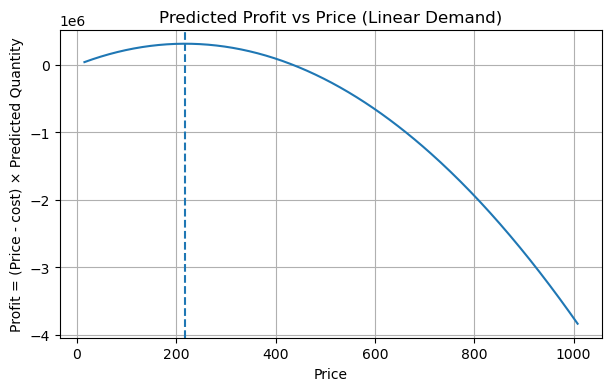

In [10]:
c = 0.0  # <-- set your marginal cost here

def profit_linear(p, a, b, c):
    return (p - c) * demand_linear(p, a, b)

if b < 0:
    P_star_profit = (b * c - a) / (2 * b)
    print(f"Analytical profit-maximising price: {P_star_profit:.2f}")
else:
    P_star_profit = np.nan
    print("b >= 0, no interior optimum under linear demand.")

# Numerical verification
grid = np.linspace(df["Price"].min(), df["Price"].max(), 300)
prof = profit_linear(grid, a, b, c)
p_num = grid[np.argmax(prof)]
print(f"Numerical optimum on grid: {p_num:.2f}")

plt.figure()
plt.plot(grid, prof)
if not np.isnan(P_star_profit):
    plt.axvline(P_star_profit, linestyle="--")
plt.title("Predicted Profit vs Price (Linear Demand)")
plt.xlabel("Price")
plt.ylabel("Profit = (Price - cost) × Predicted Quantity")
plt.show()



## 9. Interpretation & next steps

- Compare **elasticity** from the linear model at the mean vs the **log–log** elasticity.  
  - If \(|e| > 1\), demand is **elastic** in the sample; raising price tends to **reduce** revenue.
  - If \(|e| < 1\), demand is **inelastic**; raising price tends to **increase** revenue.
- The linear model also gives a closed‑form **revenue‑maximising price**. Consider realistic bounds (e.g., prices must stay within your feasible range) and **marginal cost** when optimising **profit**.
- Always check diagnostics: a low \(R^2\) or significant residual patterns mean other drivers (seasonality, marketing, income, substitutes, etc.) should be added. Try extensions like:
  - Multiple regression with more predictors (competitor price, promotions, day‑of‑week, etc.).
  - Log‑log models for direct elasticity and to reduce heteroskedasticity.
  - Cross‑validation, robust regression, or regularization if you add many features.
